## Const(定数)

In [1]:
LEARNING_RATE = 0.15
DISCOUNT_RATE = 0.85

EPSILON_RATE = 0.1

## Stage

In [2]:
#0が壁
#1が道
#2がスタート
#3がゴール

row0 = [0,0,0,0,0,0,0,0,0,0,0]
row1 = [0,2,1,1,1,1,0,1,0,0,0]
row2 = [0,1,1,1,0,1,1,1,1,1,0]
row3 = [0,1,0,1,1,1,0,1,0,1,0]
row4 = [0,1,0,0,0,1,1,0,1,1,0]
row5 = [0,1,0,1,0,1,1,1,0,1,0]
row6 = [0,0,0,1,1,1,1,1,0,3,0]
row7 = [0,0,0,0,0,0,0,0,0,0,0]

STAGE = [row0, row1, row2, row3, row4, row5, row6, row7]

START_X = 0
START_Y = 0

for x,v in enumerate(STAGE):
    for y,w in enumerate(v):
        if w == 2:
            #print("{0} {1}".format(x,y))
            START_X = x
            START_Y = y
            break

NUM_COL = len(row0)
NUM_ROW = len(STAGE)

#print('COL:{}, ROW:{}'.format(NUM_COL, NUM_ROW))
            
            
def isMove(x, y):
    if STAGE[y][x] != 0:
        return True
    else:
        return False

def isGoal(x, y):
    if STAGE[y][x] == 3:
        return True
    else:
        return False
    
def getStage(x, y):
    return STAGE[y][x]
    

## Agent

In [3]:
'''
コマンド
↑ : 0
← : 1
↓ : 2
→ : 3
'''

class Agent:
    def __init__(self):
        self.current_x = START_X
        self.current_y = START_Y
    
    def move(self, action):
        if action.command == 0 and isMove(self.current_x, self.current_y - 1):
            self.current_y -= 1
        elif action.command == 1 and isMove(self.current_x - 1, self.current_y):
            self.current_x -= 1
        elif action.command == 2 and isMove(self.current_x, self.current_y + 1):
            self.current_y += 1
        elif action.command == 3 and isMove(self.current_x + 1, self.current_y):
            self.current_x += 1
    
    def move_start(self):
        self.current_x = START_X
        self.current_y = START_Y
        
    def GoalCheck(self):
        return isGoal(self.current_x, self.current_y)

## Action

In [4]:
# possibility:移動可能かどうか
# は省略

class Action:
    def __init__(self, command):
        self.qValue = 0.00
        self.command = command
    
    def setPossibility(self, command):
        self.command = command
    
    def updateQValue(self, state):
        alpha = LEARNING_RATE
        gamma = DISCOUNT_RATE
        r = state.reward
        maxQ = state.getMaxQAction().qValue
        self.qValue = self.qValue + alpha * (r + gamma * maxQ - self.qValue)

## State

In [5]:
import random

class State:
    def __init__(self):
        self.reward = 0.00
        self.action = [Action(0),Action(1),Action(2),Action(3)]
        
    def getMaxQAction(self):
        m = max(range(len(self.action)), key = lambda i: self.action[i].qValue)
        if self.action[0].qValue == 0.00 and self.action[1].qValue == 0.00 and self.action[2].qValue == 0.00 and self.action[3].qValue == 0.00:
            m = random.randint(0,3)
        
        return self.action[m]
            
    def actionSelect(self):
        chosen = 0
        if random.random() > EPSILON_RATE:
            chosen = self.getMaxQAction().command
        else:
            chosen = random.randint(0,3)
        
        return self.action[chosen]

## Map

Stage[0][0] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][1] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][2] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][3] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][4] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][5] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][6] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][7] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][8] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][9] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[0][10] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][0] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][1] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][2] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][3] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][4] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][5] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][6] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][7] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][8] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][9] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[1][10] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[2][0] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[2][1] (↑:0.0, ←:0.0, ↓:0.0, →:0.0)
Stage[2][2] (↑

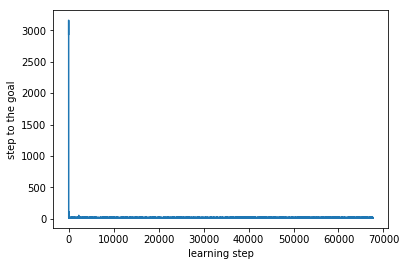

In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


class Map:
    def __init__(self):
        #agentとfieldを生成
        #agentの初期座標から現在のagentの位置のstateを別に取得しておく
        self.agent = Agent()
        self.field = [ [State() for i in range(NUM_COL)] for j in range(NUM_ROW) ]
        self.state = self.field[self.agent.current_y][self.agent.current_x]
        self.count = 0
        
        #ゴールに報酬を設定
        for y in range(NUM_ROW):
            for x in range(NUM_COL):
                if ( isGoal(x, y) ):
                    self.field[y][x].reward = 1000
        
        self.data = []
        
    
    #agentの初期化
    def clear(self):
        self.agent.move_start()
        self.state = self.field[self.agent.current_y][self.agent.current_x]
        #print('clear count = {}'.format(self.count))
        self.data.append(self.count)
        self.count = 0
        
    
    def step(self):
        self.action = self.state.actionSelect()
        self.agent.move(self.action)
        self.state = self.field[self.agent.current_y][self.agent.current_x]
        #QValueを更新
        self.action.updateQValue(self.state)
        
        #count(ゴールまでにかかったステップ数)を1増やす
        
        self.count += 1
        
        if isGoal(self.agent.current_x, self.agent.current_y):
            self.clear()  

    def update(self):
        self.step()
        
    def drawQvalue(self):
        for y in range(NUM_ROW):
            for x in range(NUM_COL):
                tmpState = self.field[y][x]
                print('Stage[{0}][{1}] (↑:{2}, ←:{3}, ↓:{4}, →:{5})'.format(y, x,
                                                                          tmpState.action[0].qValue,
                                                                          tmpState.action[1].qValue,
                                                                          tmpState.action[2].qValue,
                                                                          tmpState.action[3].qValue))
        
        
            
map = Map()

map.drawQvalue()

for i in range(1000000):
    map.update()

print('-----------')
    
map.drawQvalue()

plt.plot(map.data)
plt.xlabel('learning step')
plt.ylabel('step to the goal')

plt.show()


